In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
def FiniteDif2D(h,t0,tn,l,x0,xn,y0,yn,u0,ux0,uxn,uy0,uyn,D,f,nad):
  # h - крок чисельного розв'язання по часу
  # t0 - початковий час, не обов'язково дорівнює 0
  # tn - кінцевий час
  # l - крок чисельного розв'язання по координаті
  # x0 - початкова координата, ліва границя системи по х
  # xn - кінцева координата, права границя системи по х
  # y0 - початкова координата, нижня границя системи по у
  # yn - кінцева координата, верхня границя системи по у
  # u0 - початкова умова (функція від х та у для t=0)
  # ux0 - ліва гранична умова (функція від t та у для х=0)
  # uxn - права гранична умова (функція від t та у для х=xn)
  # uу0 - нижня гранична умова (функція від t та х для у=0)
  # uуn - верхня гранична умова (функція від t та х для у=уn)
  # приведений коефіцієнт біля другої похідної по координаті D=k/c для теплопровідності
  # f - функція, що задана дифрівнянням і додається до похідної по координаті
  # nad - кількість кроків у додатковому масиві, визначає у скільки разів зменшуємо реальний крок
  nt=math.ceil((tn-t0)/h) #кількість кроків по часу, округлена вгору
  nx=math.ceil((xn-x0)/l) #кількість кроків по координаті x, округлена вгору
  ny=math.ceil((yn-y0)/l) #кількість кроків по координаті y, округлена вгору
  t=np.array([t0+nad*i*h for i in range(nt//nad+1)]) #створюємо масив часу
  x=np.array([x0+i*l for i in range(nx+1)]) #створюємо масив координати x
  y=np.array([y0+i*l for i in range(ny+1)]) #створюємо масив координати y
  u=np.zeros((nt//nad+1,nx+1,ny+1)) #створили заготовку для масиву функції
  uad=np.zeros((nad+1,nx+1,ny+1)) #створили заготовку для додаткового масиву функції
  u[0]=u0(x,y) #вносимо початкову умову
  uad[0]=u0(x,y)
  u[:,0,:]=ux0(t,y) #вносимо першу граничну умову по х
  u[:,-1,:]=uxn(t,y) #вносимо другу граничну умову по х
  u[:,:,0]=uy0(t,x) #вносимо першу граничну умову по y
  u[:,:,-1]=uyn(t,x) #вносимо другу граничну умову по y
  Darray=D(x,y)
  for k in range(nt//nad):
      tad=np.array([t0+nad*k*h+i*h for i in range(nad+1)])
      uad[:,0,:]=ux0(tad,y)
      uad[:,-1,:]=uxn(tad,y)
      uad[:,:,0]=ux0(tad,x)
      uad[:,:,-1]=uxn(tad,x)
      uad[1,1:-1,1:-1]=(uad[0,1:-1,1:-1]+
                  h*Darray/l**2*(uad[0,2:,1:-1]+uad[0,:-2,1:-1]
                            +uad[0,1:-1,2:]+uad[0,1:-1,:-2]
                            -4*uad[0,1:-1,1:-1])+
                  h*f(tad[0],x[1:-1],y[1:-1],uad[0,1:-1,1:-1]))
      for i in range(1,nad): 
                  uad[i+1,1:-1,1:-1]=(uad[i-1,1:-1,1:-1]+
                  2*h*Darray/l**2*(uad[i,2:,1:-1]+uad[i,:-2,1:-1]
                              +uad[i,1:-1,2:]+uad[i,1:-1,:-2]
                              -4*uad[i,1:-1,1:-1])+
                  2*h*f(tad[i],x[1:-1],y[1:-1],uad[i,1:-1,1:-1]))
      u[k+1]=np.array(uad[-1])
      uad[0]=np.array(uad[-1])
  return (t,x,y,u)

In [2]:
(x0,xn)=(0,10) # межі плівки по горизонталі
(y0,yn)=(0,10) # межі плівки по вертикалі

# Плівка не є однорідною, тому тепер D - це функція, що має видавати масив
def D(x,y):
    return 0.03

def S2D(t,x,y,u):
    S=-math.pi/20*u*np.cos((t-10)%(2*math.pi))+0.04*u
    return S

# Функція, задана дифрівнянням, залежить від координати, тому має бути масивом
def u02D(x,y):
  nx=len(x) #Визначаємо скільки точок має бути по х
  ny=len(y) #Визначаємо скільки точок має бути по y
  u0=np.zeros((nx,ny)) # Створюємо заготовку
  for j in range(ny):
    for i in range(nx):
      if (x[i]-5)**2+(y[j]-5)**2<=1:
        u0[i,j]=10
      else:
        u0[i,j]=0
  return u0


def ux02D(t,y):
    return 0

def uxn2D(t,y):
    return 0

def uy02D(t,x):
    return 0

def uyn2D(t,x):
    return 0
print(math.pi)

3.141592653589793


In [3]:
(T,X,Y,U)=FiniteDif2D(0.005,0,500,2.5,x0,xn,y0,yn,u02D,ux02D,uxn2D,uy02D,uyn2D,D,S2D,1000)



0.0
80686934.43668444


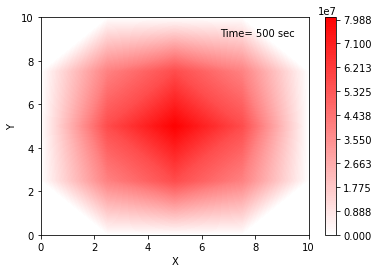

In [4]:
N=100 #Задає кількість кроків дискретизації по діапазону даних функції
# Визначаємо у яких межах лежать значення функції
z0=np.amin(U[-1])
print(z0)
zn=np.amax(U[-1])
print(zn)
zcont=[z0+(zn-z0)*i/N for i in range(N+1)] # Масив значень функції, для кожного з яких буде свій колір
zcol=[(1.0,1.0-1.0*i/N,1.0-1.0*i/N) for i in range(N+1)] # Масив кольорів для кожного діапазону значень функції
plt.contourf(X,Y, np.transpose(U[-1]),zcont,colors=zcol) #Будується графік функції двох змінних
plt.xlabel('X', fontsize=10)
plt.ylabel('Y', fontsize=10)
plt.text(9.5,9.5,'Time= 500 sec',fontsize = 10, ha='right', va='top')
plt.colorbar()

-10.0
80686934.43668444


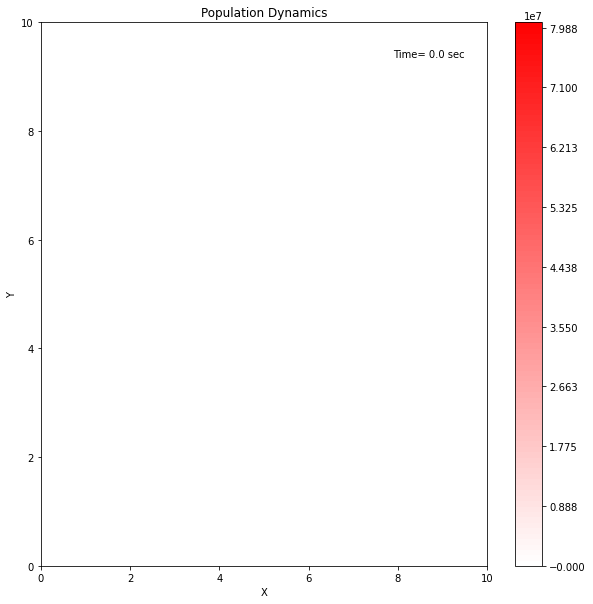

In [5]:
from matplotlib.animation import FuncAnimation

# Задамо крок по кадрам
k=3

NT=len(T)
NT=NT//k+1
fig = plt.figure(figsize=(10, 10))
z0=-np.amax(U[0])#підгонка для плавності анімації
print(z0)
zn=np.amax(U[-1])
print(zn)
zcont=[z0+(zn-z0)*i/N for i in range(N+1)] # Масив значень функції, для кожного з яких буде свій колір
zcol=[(1.0,1.0-1.0*i/N,1.0-1.0*i/N) for i in range(N+1)] # Масив кольорів для кожного діапазону значень функції
        
def animate(i): #Функція, яка для кожного і-го кадру анімації будує свій графік
    plt.gcf().clear() #Очищуємо фігуру
    plt.title('Population Dynamics') 
    plt.ylabel('Y')
    plt.xlabel('X')
    Z = np.transpose(U[i]) #2д розподіл температури в момент часу ti
    plt.contourf(Y,X,Z,zcont,colors=zcol) #Побудова графіку
    plt.colorbar() 
    plt.xlabel('X', fontsize=10)
    plt.ylabel('Y', fontsize=10)
    plt.text(9.5,9.5,'Time= '+str(round(T[i*k],2))+' sec',fontsize = 10, ha='right', va='top')
    return fig

anim = FuncAnimation(fig, animate, frames=NT, interval=2)
 
anim.save('Population_Dynamics_2D(3).gif', writer='pillow')

Дуже швидке розмноження відбувається з центру середовища по всьому середовищу, найбільш інтенсивне розмноження відбувається у центрі плівки і менш інтенсивне на переферії

In [ ]:
# Аналогічно до анімації збережемо лише кожне п'яте значення
k=5 #Якщо хочеться зберегти все, то цей коефіцієнт варто встановити 1

# Збереження даних
import pandas as pd
writer = pd.ExcelWriter('Substance_Transport_2D.xlsx')
x=pd.DataFrame(X)
x.to_excel(writer, 'X')
y=pd.DataFrame(X)
y.to_excel(writer, 'Y')
for i in range(len(U)//k+1):
  u=pd.DataFrame(U[i*k])
  u.to_excel(writer, 'Sheet '+str(i))
writer.save()